<a href="https://colab.research.google.com/github/AI-Sunmoon2021/ImageProcessingProjects/blob/main/MeatAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

## **목적** >  **이미지 분류 모델을 통한 고기 판별 Web앱 만들기**


---


학습시킬 이미지 양이 너무 부족해 사전의 학습된 VGG16 신경망을 활용하여 전이학습을 진행함.

---
*  Keras습특
*  CNN 이해
*  Keras 이전학습된 모델 VGG16를 이용항 클래스 분류


---

## **개요**
*  데이터셋：ImageNet
*  네트워크：VGG16
*  실행환경：windows10, Google Colaboratory（GPU）
*  최적화 알고리즘 :RMSpropGraves

---

## **ImageNet**
*  1400만이미지、2만 클래스의 대이터셋


---


## **VGG16**
*  ImageNet에서 추출된 이미지 (1000클래스)로 학습한 모델
*  전결합층×3、합성곱층×13의 16층 뉴럴 네트워크

* 큰 단점:

1.   학습이 매우 느리다>이유는 파라미터가 많기 때문에.
2.   용량이 엄청나게 크다>많은 파라미터 때문에 생기는 단점.

VGG는 각각 533MB, 574MB 이다. 케라스로 직접 받으면 상당히 오래 걸리고 하드용량이 1기가가 줄어듬.

다행히 다음 모델들부터는 이 단점이 개선되었음.



---





## **최적화 (Optimization):**

1.   함수 등을 최적의 상태로 접근하는 것. 
2.   깊은 학습의 최적화는 모델의 예측 값과 실제 값과의 오차에서 매개 변수 (무게)를 업데이트하는 것.
3.   그 최적화 기법은 다음과 같이 여러 가지가 있음.
4.   매개 변수를 업데이트 할 때 수식이 각각 다름.


# **SGD:**
SGD 와 Stochastic Gradient Descent의 약자로 일본어로는 확률 적 기울기 강하 법 이라고합니다. 가장 기본적인 알고리즘 입니다. 확률 적 기울기 강하 법 은 훈련 데이터로부터 하나씩 데이터를 무작위로 추출하여 그 데이터 점의 기울기를 계산하고 매개 변수를 업데이트합니다. 자세한 내용은 여기 를 참조하십시오.

> インデントされたブロック



# **MomentumSGD:**
MomentumSGD은 SGD 관성 항을 부여한 것입니다. 관성 항 (Momentum : 모멘텀)은 경사 강하 법의 식을 확장하여보다 신속하게 수렴하도록 고안하기위한 매개 변수로 존재하고 있습니다.

> インデントされたブロック



# **AdaGrad:**
논문:http://jmlr.org/papers/v12/duchi11a.html

> インデントされたブロック



# **AdaDelta:**
논문:http://www.matthewzeiler.com/pubs/googleTR2012/googleTR2012.pdf

> インデントされたブロック



# **Adam:**
논문:[1412.6980v8] Adam: A Method for Stochastic Optimization
     https://arxiv.org/abs/1412.6980v8
     
> インデントされたブロック



# **RMSpropGraves:**
논문:[1308.0850] Generating Sequences With Recurrent Neural Networks
     https://arxiv.org/abs/1308.0850

> インデントされたブロック



# **NesterovAG:**
논문:[1212.0901] Advances in Optimizing Recurrent Networks
     https://arxiv.org/abs/1212.0901


> インデントされたブロック




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.applications.vgg16 import VGG16


In [ ]:
keras.__version__

'2.4.3'

**訓練画像、検証画像、テスト画像のディレクトリ/훈련이미지, 검층이미지, 테스트이미지 디렉토리**

In [ ]:
# 分類クラス
classes = ['rare', 'welldone']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = "."

train_dir = os.path.join(base_dir, '/content/drive/MyDrive/Colab Notebooks/data/train')
validation_dir = os.path.join(base_dir, '/content/drive/MyDrive/Colab Notebooks/data/validation')
test_dir = os.path.join(base_dir, '/content/drive/MyDrive/Colab Notebooks/data/test')

train_rare_dir = os.path.join(train_dir, 'rare')
train_welldone_dir = os.path.join(train_dir, 'welldone')

validation_rare_dir = os.path.join(validation_dir, 'rare')
validation_welldone_dir = os.path.join(validation_dir, 'welldone')

test_rare_dir = os.path.join(test_dir, 'rare')
test_welldone_dir = os.path.join(test_dir, 'welldone')

# 画像サイズ
img_rows, img_cols = 200, 200


**画像データの数を確認する/이미지데이터가 얼마나 있는지 확인**

In [ ]:
print('total training rare images:', len(os.listdir(train_rare_dir )),train_rare_dir )
print('total training welldone images:', len(os.listdir(train_welldone_dir)),train_welldone_dir)

print('total validation rare images:', len(os.listdir(validation_rare_dir)),validation_rare_dir)
print('total validation welldone images:', len(os.listdir(validation_welldone_dir)),validation_welldone_dir)

print('total test rare images:', len(os.listdir(test_rare_dir)),test_rare_dir)
print('total test welldone images:', len(os.listdir(test_welldone_dir)),test_welldone_dir)


total training rare images: 330 /content/drive/MyDrive/Colab Notebooks/data/train/rare
total training welldone images: 220 /content/drive/MyDrive/Colab Notebooks/data/train/welldone
total validation rare images: 20 /content/drive/MyDrive/Colab Notebooks/data/validation/rare
total validation welldone images: 19 /content/drive/MyDrive/Colab Notebooks/data/validation/welldone
total test rare images: 1 /content/drive/MyDrive/Colab Notebooks/data/test/rare
total test welldone images: 1 /content/drive/MyDrive/Colab Notebooks/data/test/welldone


**ImageDataGeneratorを使って画像データを拡張する/ImageDataGenerator를 사용하여 이미지데이터를 확장시킴**


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(img_rows, img_cols),color_mode='rgb',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator,shuffle=True)

Found 550 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
    
validation_generator = test_datagen.flow_from_directory(directory=validation_dir,target_size=(img_rows, img_cols),color_mode='rgb',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator,shuffle=True)

Found 39 images belonging to 2 classes.


**VGG16モデル/vgg16모델**

In [ ]:
input_tensor = Input(shape=(img_rows, img_cols, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
vgg16.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
______________________________________________________________

**VGG16モデルに全結合分類器を追加する/vgg16모델에 전결합분류기를 추가**

In [ ]:
top_model = Sequential()
#model.add(vgg16)
#model.add(Flatten())
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(nb_classes, activation='softmax'))
model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

**VGG16のblock5_conv1以降と追加した全結合分類器のみ訓練する/vgg16의 block5_conv1이후와 추가한 전결합분류기만을 훈련시킴**

In [ ]:
vgg16.trainable = True

set_trainable = False
for layer in vgg16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
for layer in vgg16.layers:
    print(layer, layer.trainable )


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fa8671fba90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8679de950> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8673013d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa8631c7f50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631d0d10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631d0190> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa8631da990> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631ddfd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631e58d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631d6f50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa8631efcd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable )
  

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fa8671fba90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8679de950> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8673013d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa8631c7f50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631d0d10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631d0190> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa8631da990> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631ddfd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631e58d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa8631d6f50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa8631efcd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

**学習/학습**

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=25,epochs=30,validation_data=validation_generator,validation_steps=10,verbose=1)   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
25/25 [==============================] - 251s 10s/step - loss: 0.6668 - acc: 0.6124 - val_loss: 0.5680 - val_acc: 0.8205
Epoch 2/30
25/25 [==============================] - 220s 9s/step - loss: 0.3590 - acc: 0.8498
Epoch 3/30
25/25 [==============================] - 218s 9s/step - loss: 0.2314 - acc: 0.9088
Epoch 4/30
25/25 [==============================] - 221s 9s/step - loss: 0.1382 - acc: 0.9523
Epoch 5/30
25/25 [==============================] - 219s 9s/step - loss: 0.1151 - acc: 0.9627
Epoch 6/30
25/25 [==============================] - 219s 9s/step - loss: 0.0678 - acc: 0.9757
Epoch 7/30
25/25 [==============================] - 220s 9s/step - loss: 0.0472 - acc: 0.9820
Epoch 8/30
25/25 [==============================] - 224s 9s/step - loss: 0.0444 - acc: 0.9842
Epoch 9/30
25/25 [==============================] - 221s 9s/step - loss: 0.0220 - acc: 0.9959
Epoch 10/30
25/25 [==============================] - 221s 9s/step - loss: 0.0192 - acc: 0.9963
Epoch 11/30
25/25 [==

**学習結果を保存する/학습결과를 저장함**

In [ ]:
hdf5_file = os.path.join(base_dir, 'meats-model.hdf5')
model.save_weights(hdf5_file)

**学習推移をグラフに表示する/학습추이를 그래프로 나타냄**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

ValueError: ignored

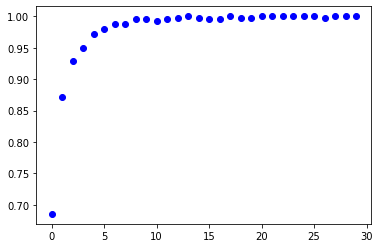

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**テストの画像データで正解率を調べる/테스트의 이미지데이터를 가져오고 정확률을 확인함**

In [ ]:
test_generator = test_datagen.flow_from_directory(directory=test_dir,target_size=(img_rows, img_cols),color_mode='rgb',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 2 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 1.0


**実際にテスト画像を分離してみる/실체로 테스트이미지를 분리함**

In [ ]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

In [ ]:
filename = os.path.join(test_dir, 'rare')
filename = os.path.join(filename, 'rare_test1.jpg')
filename

'/content/drive/MyDrive/Colab Notebooks/data/test/rare/rare_test1.jpg'

In [ ]:
from PIL import Image

In [ ]:
img = np.array( Image.open(filename))
plt.imshow( img )

In [ ]:
img = load_img(filename, target_size=(img_rows, img_cols))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

predict = model.predict(preprocess_input(x))
for pre in predict:
    y = pre.argmax()
    print("test result=",classes[y], pre)

test result= welldone [1.2407979e-24 1.0000000e+00]
